In [2]:
import os
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import statsmodels.api as sm
import xarray as xr
from matplotlib.colors import TwoSlopeNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [10]:
evapotranspiration_ds = xr.open_dataset("results/model_output_evapotranspiration.nc")
runoff_ds = xr.open_dataset("results/model_output_runoff.nc")
snow_ds = xr.open_dataset("results/model_output_snow.nc")
soil_moisture_ds = xr.open_dataset("results/model_output_soil_moisture.nc")

In [11]:
# evapotranspiration_df = evapotranspiration_ds.to_dataframe()
# runoff_df = runoff_ds.to_dataframe()
# snow_df = snow_ds.to_dataframe()
# soil_moisture_df = soil_moisture_ds.to_dataframe()

In [12]:
# output_df = evapotranspiration_df.merge(runoff_df, left_index=True, right_index=True)
# output_df = output_df.merge(snow_df, left_index=True, right_index=True)
# output_df = output_df.merge(soil_moisture_df, left_index=True, right_index=True)

# output_df

evapotranspiration     runoff  snow  soil_moisture
time       lat   lon                                                      
2000-01-01 55.25 4.75                  NaN        NaN   NaN            NaN
                 5.25                  NaN        NaN   NaN            NaN
                 5.75                  NaN        NaN   NaN            NaN
                 6.25                  NaN        NaN   NaN            NaN
                 6.75                  NaN        NaN   NaN            NaN
...                                    ...        ...   ...            ...
2023-12-31 44.75 13.25                 NaN        NaN   NaN            NaN
                 13.75           -0.180760   5.610662   0.0     425.416401
                 14.25           -0.163932  10.370307   0.0     427.023238
                 14.75            0.017972   7.826833   0.0     422.696825
                 15.25            0.164877   3.175741   0.0     419.654532

[4242744 rows x 4 columns]

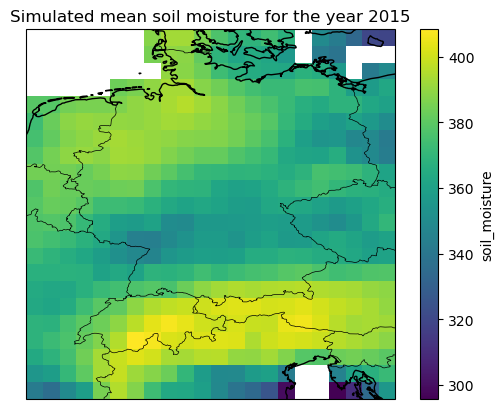

In [22]:
# Calculate Soil Moisture Mean Data for one year for all gridcells
year = 2015

sm_data_year = soil_moisture_ds.sel(time=str(year))
sm_mean_data = sm_data_year['soil_moisture'].mean(dim='time')

# Create a plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.coastlines()

# Plot the data
sm_mean_data.plot.imshow(x='lon', y='lat', cmap='viridis', transform=ccrs.PlateCarree(), ax=ax)

plt.title(f'Simulated mean soil moisture for the year {year}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

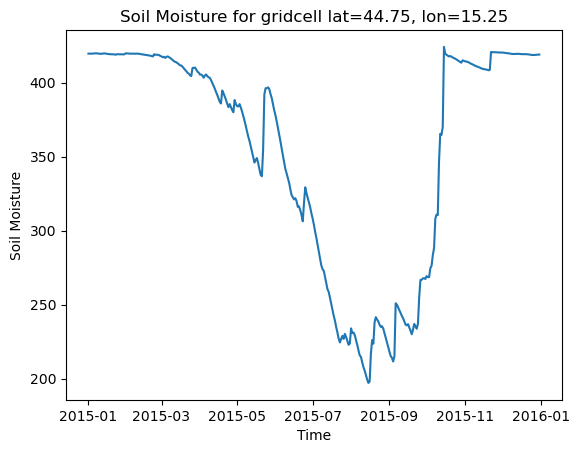

In [25]:
# Plot the time series of Soil Moisture for one year for one gridcell
year = 2015
lon = 15.25
lat = 44.75

sm_data_year = soil_moisture_ds.sel(time=str(year), lon=lon, lat=lat)

# Plot the soil moisture over time
plt.plot(sm_data_year['time'], sm_data_year['soil_moisture'])
plt.xlabel('Time')
plt.ylabel('Soil Moisture')
plt.title(f'Soil Moisture for gridcell lat={lat}, lon={lon}')
plt.show()
